In [4]:
import pandas as pd

diabetes = pd.read_csv("diabetes.csv")

df = diabetes.copy()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df["Outcome"] = df["Outcome"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


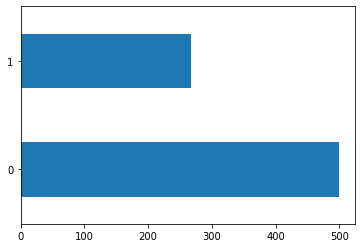

In [10]:
df["Outcome"].value_counts().plot.barh()

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


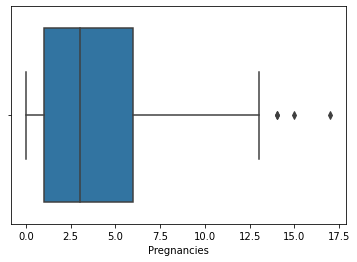

In [12]:
import seaborn as sns

sns.boxplot(x = 'Pregnancies', data = df)

In [13]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [18]:
model.intercept_

array([-8.15411743])

In [20]:
model.coef_

array([[ 0.09075471,  0.03388334, -0.01370135,  0.00460041, -0.00139622,
         0.08794223,  0.80669041,  0.02007397]])

In [21]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [22]:
from sklearn.metrics import confusion_matrix

df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Positive', 'Predicted Negative'], 
                  index=['Actual Positive', 'Actual Negative'])
df

,Predicted Positive,Predicted Negative
Actual Positive,98,9
Actual Negative,18,29


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred, ))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1 Score: 0.6823529411764706


In [25]:
y_probability = model.predict_proba(X_test)
y_probability = y_probability[:,1]
y_probability[0:10]

array([0.95987534, 0.16518598, 0.094649  , 0.63345605, 0.12286585,
       0.03808818, 0.74122354, 0.84721759, 0.37540482, 0.36741731])

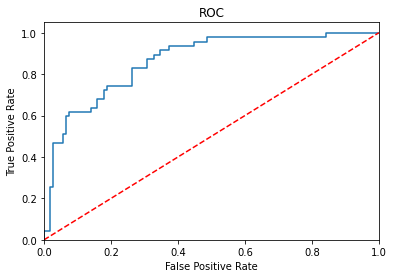

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [27]:
import numpy as np
import pandas as pd
from sklearn import datasets

wine = datasets.load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_data['target'] = wine.target

wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


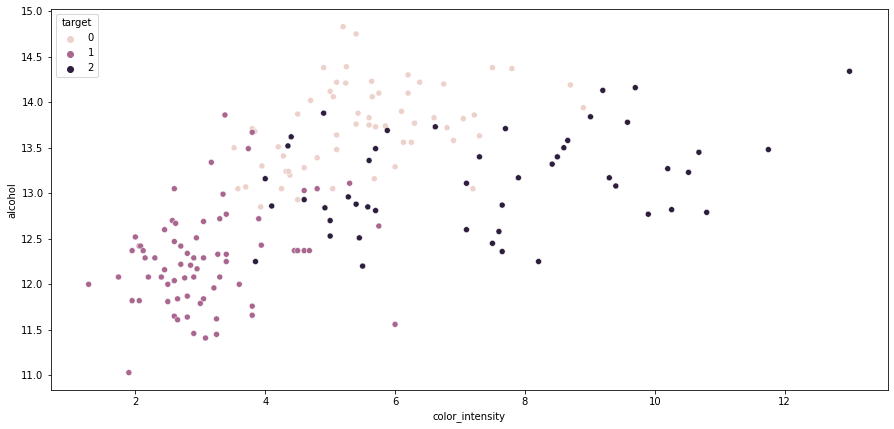

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
sns.scatterplot(x='color_intensity', y='alcohol', hue='target', data=wine_data);

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) 

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 2,
       0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 2, 1, 0])

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7222222222222222

In [32]:
from sklearn.model_selection import GridSearchCV

knn_tuning = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn_tuning, param_grid, cv=5)
knn_gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [33]:
print("best parameter:",knn_gs.best_params_)
print("The mean accuracy of the scores:",knn_gs.best_score_)

best parameter: {'n_neighbors': 6}
The mean accuracy of the scores: 0.7583333333333333


breast cancer

In [34]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

X , y = load_breast_cancer(return_X_y=True)
df = pd.DataFrame(X, columns=load_breast_cancer().feature_names)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [36]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


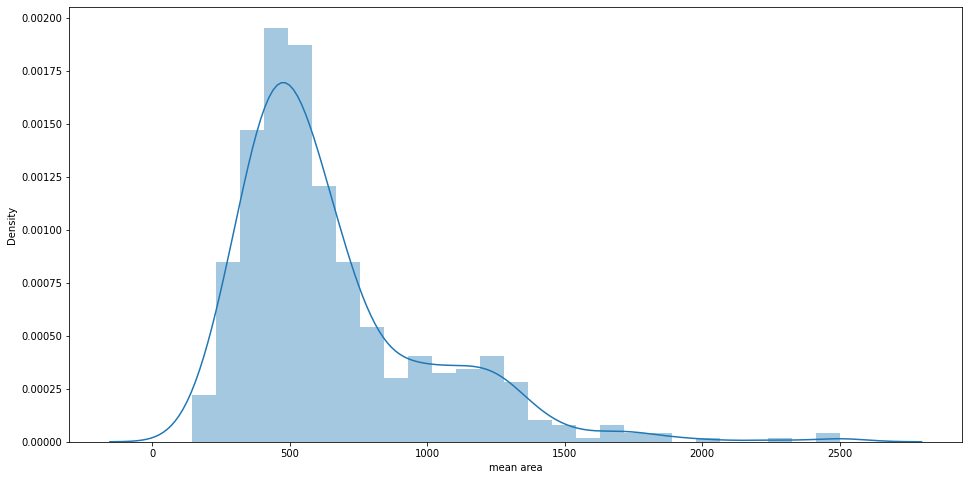

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.distplot(df["mean area"])

In [39]:
# outlier detection - 3 sigma
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df))
z

array([[1.09706398, 2.07333501, 1.26993369, ..., 2.29607613, 2.75062224,
        1.93701461],
       [1.82982061, 0.35363241, 1.68595471, ..., 1.0870843 , 0.24388967,
        0.28118999],
       [1.57988811, 0.45618695, 1.56650313, ..., 1.95500035, 1.152255  ,
        0.20139121],
       ...,
       [0.70228425, 2.0455738 , 0.67267578, ..., 0.41406869, 1.10454895,
        0.31840916],
       [1.83834103, 2.33645719, 1.98252415, ..., 2.28998549, 1.91908301,
        2.21963528],
       [1.80840125, 1.22179204, 1.81438851, ..., 1.74506282, 0.04813821,
        0.75120669]])

In [40]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

74

In [41]:
new_df = df.drop(outliers, axis = 0).reset_index(drop = False)
display(new_df)

y_new = y[list(new_df["index"])]

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
491,563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
492,564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
493,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


In [42]:
#Scaling
X_new = new_df.drop('index', axis = 1)

from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_new)
X_scaled

array([[0.83424397, 0.38362684, 0.82273105, ..., 0.68863384, 0.3717064 ,
        0.42980015],
       [0.78021978, 0.54926226, 0.79595605, ..., 0.89966679, 0.64240903,
        0.41158614],
       [0.81705445, 0.22037125, 0.84304312, ..., 0.60162903, 0.25062735,
        0.27498103],
       ...,
       [0.89502118, 0.60352213, 0.90674915, ..., 0.82043688, 0.15526976,
        0.20376929],
       [0.80723187, 0.88243693, 0.80703536, ..., 0.60273973, 0.31587202,
        0.14330888],
       [0.59052121, 0.87434555, 0.59560521, ..., 0.52499074, 0.20483061,
        0.29294207]])

In [43]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression

#Scaling and outlier removed
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)

models = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(models,X_train, y_train, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test, y_test)))

Mean training accuracy: 0.9595202398800601
Test accuracy: 0.9664429530201343


In [44]:
cv['test_score'].mean()

0.9595202398800601

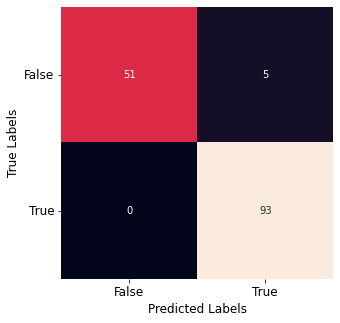

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

pred = cv["estimator"][0].predict(X_test)
cm = confusion_matrix(y_test, pred)

#visualization
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
sns.set(font_scale=3.4)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels', fontsize = 12)
ax.set_ylabel('True Labels', fontsize = 12)
plt.show()